## Data Preparation & Exploration

In [1]:
#Loading libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loading dataset
df = pd.read_csv("HospitalAdmissionPrediction.csv")

In [3]:
# display first 10 columns
df.head(10)

,ID.Codes,Readmission.Status,Gender,Race,ER,DRG.class,LOS,Age,HCC.Riskscore,DRG.Complication
0,0005EC02F1DC3A15,0,M,White,0,MED,3,71,1.631,MedicalMCC.CC
1,0005EC02F1DC3A15,0,M,White,0,SURG,2,71,1.631,Other
2,0006C4369B0D7B5F,0,M,White,0,MED,2,68,0.585,MedicalNoC
3,000960C9E1C43BE4,0,F,White,0,SURG,12,79,1.660,SurgNoC
4,00098CF15837D918,0,M,White,0,SURG,4,91,1.768,SurgNoC
5,00098CF15837D918,0,M,White,0,SURG,5,91,1.768,SurgMCC.CC
6,0009FBE350ADD6AC,0,F,White,1,MED,3,82,3.885,MedicalNoC
7,0009FBE350ADD6AC,0,F,White,1,MED,4,83,0.641,Other
8,000C9F383AB934B2,0,M,White,0,SURG,4,43,0.376,SurgMCC.CC
9,000DD450CF549664,0,F,Other,0,MED,4,85,0.632,MedicalMCC.CC


In [4]:
#checking shape of the dataset
df.shape

(66782, 10)

In [5]:
#Checking data types of each variable
df.dtypes

ID.Codes               object
Readmission.Status      int64
Gender                 object
Race                   object
ER                      int64
DRG.class              object
LOS                     int64
Age                     int64
HCC.Riskscore         float64
DRG.Complication       object
dtype: object

In [6]:
#Checking for missing values in dataset
df.isnull().sum()

ID.Codes              0
Readmission.Status    0
Gender                0
Race                  0
ER                    0
DRG.class             0
LOS                   0
Age                   0
HCC.Riskscore         0
DRG.Complication      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66782 entries, 0 to 66781
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID.Codes            66782 non-null  object 
 1   Readmission.Status  66782 non-null  int64  
 2   Gender              66782 non-null  object 
 3   Race                66782 non-null  object 
 4   ER                  66782 non-null  int64  
 5   DRG.class           66782 non-null  object 
 6   LOS                 66782 non-null  int64  
 7   Age                 66782 non-null  int64  
 8   HCC.Riskscore       66782 non-null  float64
 9   DRG.Complication    66782 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 5.1+ MB


In [8]:
df = df.drop(columns = "ID.Codes")

In [9]:
df.head()

,Readmission.Status,Gender,Race,ER,DRG.class,LOS,Age,HCC.Riskscore,DRG.Complication
0,0,M,White,0,MED,3,71,1.631,MedicalMCC.CC
1,0,M,White,0,SURG,2,71,1.631,Other
2,0,M,White,0,MED,2,68,0.585,MedicalNoC
3,0,F,White,0,SURG,12,79,1.660,SurgNoC
4,0,M,White,0,SURG,4,91,1.768,SurgNoC


In [10]:
df.describe()

,Readmission.Status,ER,LOS,Age,HCC.Riskscore
count,66782.000000,66782.000000,66782.000000,66782.000000,66782.000000
mean,0.125917,0.508281,6.693420,73.636309,2.345236
std,0.331758,0.817415,5.698282,13.337235,1.671520
min,0.000000,0.000000,1.000000,24.000000,0.079000
25%,0.000000,0.000000,3.000000,67.000000,1.107000
50%,0.000000,0.000000,5.000000,75.000000,1.865500
75%,0.000000,1.000000,8.000000,83.000000,3.173000
max,1.000000,9.000000,36.000000,101.000000,12.307000


 Now we can make data visualization 

## Data Visualization


Distribution of Readmission
Our target variable is imbalance. Number of readmitted patient are quite less as compared to Not readmitted

C:\Users\zainali\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distrinution of Readmission')

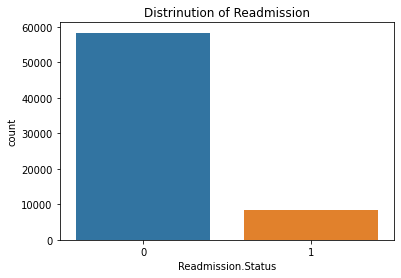

In [11]:
# Distribution of Readmission 
sns.countplot(df['Readmission.Status']).set_title('Distrinution of Readmission')

Time in Hospital and Readmission

Text(0.5, 1.0, 'Length of stay in Hospital VS. Readmission')

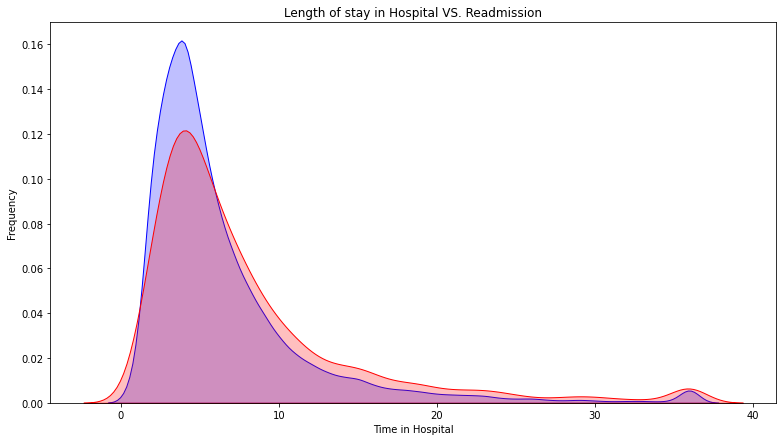

In [12]:
fig = plt.figure(figsize=(13,7),)
ax = sns.kdeplot(df.loc[(df['Readmission.Status'] == 0),'LOS'] , color='b',shade=True,label='Not Readmitted')
ax = sns.kdeplot(df.loc[(df['Readmission.Status'] == 1),'LOS'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Length of stay in Hospital VS. Readmission')

Age and Readmission

In [13]:
df['Age'] = (df['Age']/10).apply(np.ceil) 
df['Age'].value_counts()

8.0     22249
9.0     16428
7.0     14328
10.0     4520
6.0      4492
5.0      2841
4.0      1320
3.0       508
11.0       96
Name: Age, dtype: int64

C:\Users\zainali\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

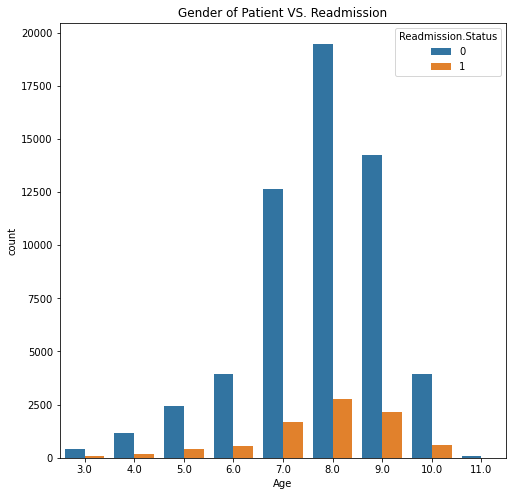

In [14]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df['Age'], hue = df['Readmission.Status']).set_title("Gender of Patient VS. Readmission")

Ethnicity of patient and Readmission


<AxesSubplot:xlabel='Race', ylabel='count'>

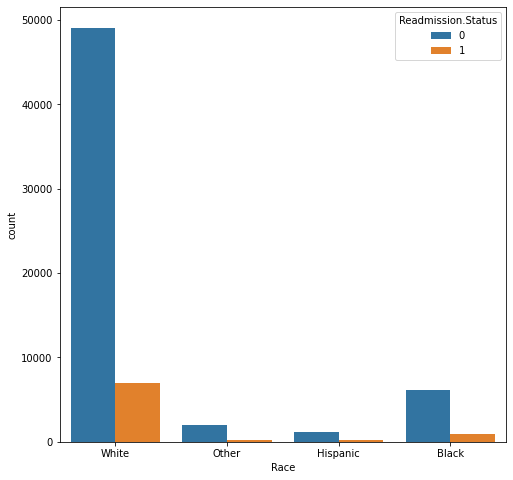

In [15]:
fig = plt.figure(figsize=(8,8))
sns.countplot(x = df['Race'], hue = df['Readmission.Status'])

Gender and Readmission


C:\Users\zainali\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

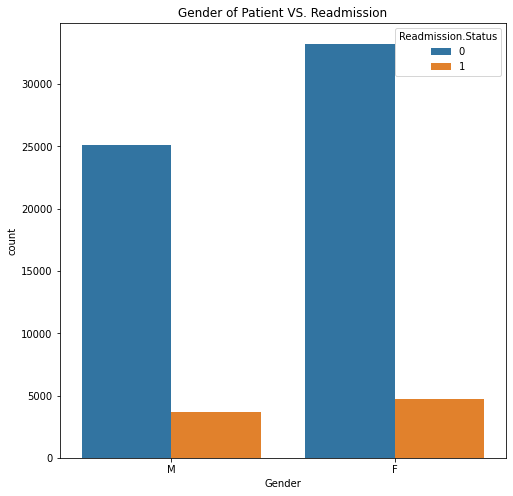

In [16]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df['Gender'], hue = df['Readmission.Status']).set_title("Gender of Patient VS. Readmission")

DRG.Complication and Readmission.Status

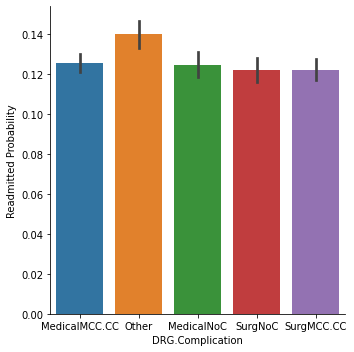

In [17]:
g = sns.catplot(x = "DRG.Complication", y = "Readmission.Status", data = df, 
                   kind = "bar", height = 5)
g.set_ylabels("Readmitted Probability")
plt.show()

Text(0.5, 1.0, 'Service Utilization VS. Readmission')

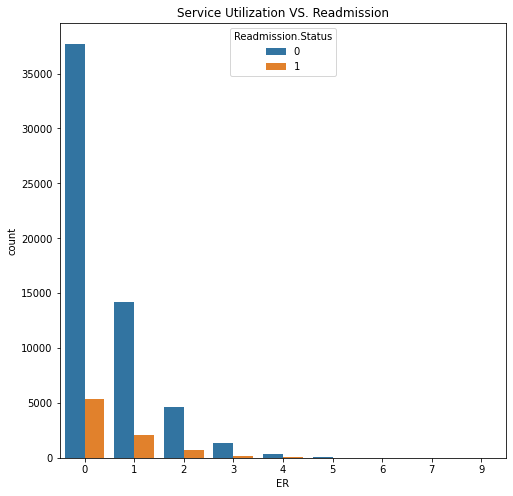

In [18]:
fig = plt.figure(figsize=(8,8))
sns.countplot( x = df['ER'],hue = df['Readmission.Status']).set_title('Service Utilization VS. Readmission')

Text(0.5, 1.0, 'HCC.Riskscore VS. Readmission')

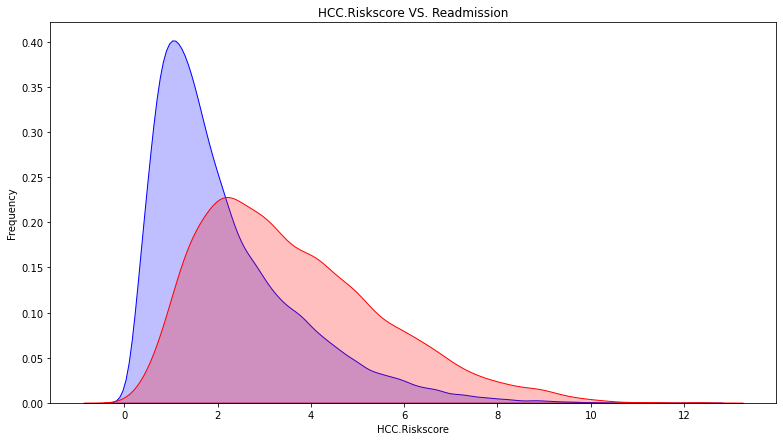

In [19]:
fig = plt.figure(figsize=(13,7),)
ax = sns.kdeplot(df.loc[(df['Readmission.Status'] == 0),'HCC.Riskscore'] , color='b',shade=True,label='Not Readmitted')
ax = sns.kdeplot(df.loc[(df['Readmission.Status'] == 1),'HCC.Riskscore'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='HCC.Riskscore', ylabel='Frequency')
plt.title('HCC.Riskscore VS. Readmission')

## Data label Encoder

we use label encoder to change categorical data to numerical data so we can fit our model

In [20]:
cat_data = df.select_dtypes('O')

num_data = df.select_dtypes(np.number)

cat_data

,Gender,Race,DRG.class,DRG.Complication
0,M,White,MED,MedicalMCC.CC
1,M,White,SURG,Other
2,M,White,MED,MedicalNoC
3,F,White,SURG,SurgNoC
4,M,White,SURG,SurgNoC
...,...,...,...,...
66777,M,White,UNGROUP,Other
66778,F,White,SURG,SurgNoC
66779,F,White,MED,MedicalNoC
66780,F,White,SURG,Other


In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in cat_data:
  cat_data[i] = le.fit_transform(cat_data[i])

C:\Users\zainali\AppData\Local\Temp/ipykernel_16560/3605614478.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i] = le.fit_transform(cat_data[i])


In [22]:
data = pd.concat([num_data,cat_data],axis=1)
data.head()

,Readmission.Status,ER,LOS,Age,HCC.Riskscore,Gender,Race,DRG.class,DRG.Complication
0,0,0,3,8.0,1.631,1,3,0,0
1,0,0,2,8.0,1.631,1,3,1,2
2,0,0,2,7.0,0.585,1,3,0,1
3,0,0,12,8.0,1.660,0,3,1,4
4,0,0,4,10.0,1.768,1,3,1,4


## Splitting the dependent and independent variable

In [23]:
X = data.drop('Readmission.Status',axis=1)
y = data['Readmission.Status']

## Splitting into train and test

In [24]:
#modelling now
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
SC = StandardScaler()

X_train_scaled = pd.DataFrame(SC.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(SC.transform(X_test),columns=X_test.columns)

In [27]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((46747, 8), (20035, 8), (46747,), (20035,))

## Logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn.metrics import accuracy_score

LR = LogisticRegression()

LR.fit(X_train_scaled,y_train)

LogisticRegression()

In [29]:
LR.score(X_train_scaled,y_train)

0.87372451708131

In [30]:
LR.score(X_test_scaled,y_test)

0.8705265784876466

In [31]:
y_pred = LR.predict(X_test)

In [32]:
confusion_matrix(y_test,y_pred)

array([[13896,  3587],
       [ 1260,  1292]], dtype=int64)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85     17483
           1       0.26      0.51      0.35      2552

    accuracy                           0.76     20035
   macro avg       0.59      0.65      0.60     20035
weighted avg       0.83      0.76      0.79     20035



In [34]:
accuracy_logit = accuracy_score(y_test,y_pred)
accuracy_logit

0.7580733715997006

## Random forest

In [35]:
RF = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)

RF.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=25, min_samples_split=10, n_estimators=10)

In [36]:
RF.score(X_train_scaled,y_train)

0.8999080154876249

In [37]:
RF.score(X_test_scaled,y_test)

0.8677813825804842

In [38]:
y_pred = RF.predict(X_test)

In [39]:
confusion_matrix(y_test,y_pred)

array([[16179,  1304],
       [ 2094,   458]], dtype=int64)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.90     17483
           1       0.26      0.18      0.21      2552

    accuracy                           0.83     20035
   macro avg       0.57      0.55      0.56     20035
weighted avg       0.81      0.83      0.82     20035



In [41]:
accuracy_rm = accuracy_score(y_test,y_pred)
accuracy_rm

0.8303968055902171

## Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=10)

In [43]:
dtree.score(X_train_scaled,y_train)

0.9199306907395127

In [44]:
dtree.score(X_test_scaled,y_test)

0.8204641876715747

In [45]:
y_pred = dtree.predict(X_test)

In [46]:
confusion_matrix(y_test,y_pred)

array([[11217,  6266],
       [ 1326,  1226]], dtype=int64)

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.64      0.75     17483
           1       0.16      0.48      0.24      2552

    accuracy                           0.62     20035
   macro avg       0.53      0.56      0.50     20035
weighted avg       0.80      0.62      0.68     20035



In [48]:
accuracy_dtree = accuracy_score(y_test,y_pred)
accuracy_dtree

0.6210631395058648

## Model Comparision

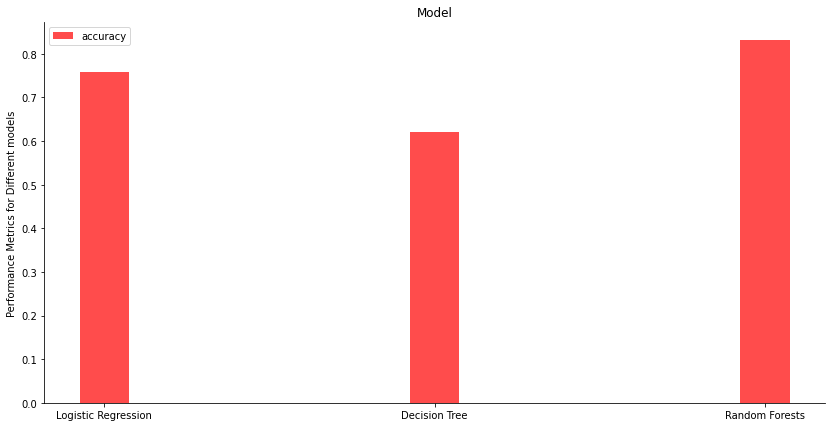

In [49]:
plt.figure(figsize=(14, 7))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests']
values = [accuracy_logit, accuracy_dtree, accuracy_rm]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)

plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()         

## Feature importance

C:\Users\zainali\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


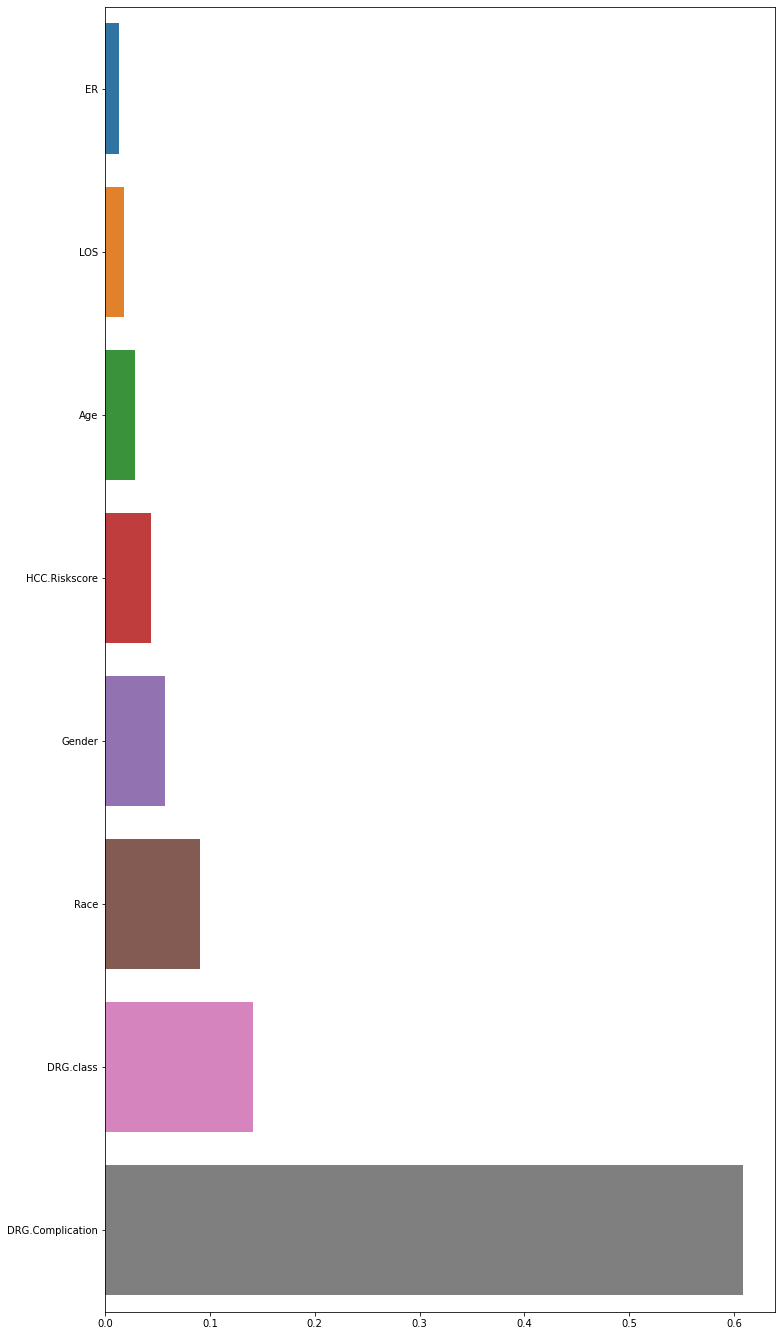

In [50]:
# Create plot of top most features based on importance
plt.figure(figsize=(12,24))
sns.barplot(sorted(RF.feature_importances_),X_train.columns);